In [104]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder

# I. Data Cleaning

In [105]:
df = pd.read_csv('../datasets/katie-animals_w_outcome.csv')

In [10]:
df['adopted'] = (df['outcome_type'] == 'Adoption').map({True: 1, False:0})

In [11]:
df.drop(columns=['outcome_type'], inplace=True)
df['month_in'] = df['month_in'].astype(str)

### Creating ALL DataFrames

In [13]:
df['intake_type'].value_counts(normalize=True)

Stray                 0.693474
Owner Surrender       0.199970
Public Assist         0.061222
Wildlife              0.039837
Abandoned             0.003476
Euthanasia Request    0.002021
Name: intake_type, dtype: float64

In [14]:
stray = df[df['intake_type']== 'Stray']
owner_surrender = df[df['intake_type']== 'Owner Surrender']
public_assist = df[df['intake_type']== 'Public Assist']
wildlife = df[df['intake_type']== 'Wildlife']
abandoned = df[df['intake_type']== 'Abandoned']
euthanasia = df[df['intake_type']== 'Euthanasia Request']

In [15]:
stray.reset_index(inplace=True)
owner_surrender.reset_index(inplace=True)
public_assist.reset_index(inplace=True)
wildlife.reset_index(inplace=True)
abandoned.reset_index(inplace=True)
euthanasia.reset_index(inplace=True)

In [26]:
stray = onehot_dataframe(stray)
stray.drop(columns='index', inplace=True)

owner_surrender= onehot_dataframe(owner_surrender)
owner_surrender.drop(columns='index', inplace=True)

public_assist = onehot_dataframe(public_assist)
public_assist.drop(columns='index', inplace=True)

wildlife = onehot_dataframe(wildlife)
wildlife.drop(columns='index', inplace=True)

abandoned = onehot_dataframe(abandoned)
abandoned.drop(columns='index', inplace=True)

euthanasia = onehot_dataframe(euthanasia)
euthanasia.drop(columns='index', inplace=True)

### One Hot Encoding

In [25]:
def onehot_dataframe(df):
    '''

    Takes in a dataframe, and returns a dataframe that will be similar to the 
    get_dummies from pandas.
    YOU MUST HAVE ONE HOT ENCODER IMPORTED FOR THIS TO WORK!
    '''

    # get our numeric columns
    numeric = df.select_dtypes(exclude=object)

    # get our categorical columns
    categorical = df.select_dtypes([object])

    # preserve the names of our categorical data
    categorical_fnames = categorical.dtypes.keys() # preserve the names

    # make sure you are importing one hot encoder, or this function will not work
    enc = OneHotEncoder(drop='first',sparse=False)

    # categorical is now an array of arrays 
    categorical = enc.fit_transform(categorical) 

    dummy_cat_names = enc.get_feature_names(categorical_fnames)

    categorical_df = pd.DataFrame(categorical, columns=dummy_cat_names)

    return pd.concat([numeric, categorical_df], axis=1)  

# III. Modeling

### Baseline

In [40]:
print('Stray')
print(stray['adopted'].value_counts(normalize=True))
print('---')
print('Owner Surrender')
print(owner_surrender['adopted'].value_counts(normalize=True))
print('---')
print('Public Assist')
print(public_assist['adopted'].value_counts(normalize=True))
print('---')
print('Wildlife')
print(wildlife['adopted'].value_counts(normalize=True))
print('---')
print('Abandoned')
print(abandoned['adopted'].value_counts(normalize=True))
print('---')
print('Euthanasia Request')
print(euthanasia['adopted'].value_counts(normalize=True))
print('---')

Stray
0    0.550385
1    0.449615
Name: adopted, dtype: float64
---
Owner Surrender
1    0.633628
0    0.366372
Name: adopted, dtype: float64
---
Public Assist
0    0.85573
1    0.14427
Name: adopted, dtype: float64
---
Wildlife
0    0.998618
1    0.001382
Name: adopted, dtype: float64
---
Abandoned
0    0.504525
1    0.495475
Name: adopted, dtype: float64
---
Euthanasia Request
0    0.945525
1    0.054475
Name: adopted, dtype: float64
---


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

In [26]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# #1 Model - Stray

In [108]:
features = (stray.drop(columns = ['adopted']).columns)
X = stray[features]
y = stray['adopted']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

In [110]:
from sklearn.preprocessing import StandardScaler

# Instantiate
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [111]:
def pipe(model):
    #instantiate model
    model = model()
    #fit to scaled data
    model.fit(X_train_sc, y_train)
    
    #make predictions
    predictions = model.predict(X_test_sc)

    #print results
    print(f'{model} training score: {model.score(X_train_sc, y_train)}')
    print(f'{model} testing score: {model.score(X_test_sc, y_test)}')

    return

In [112]:
pipe(LogisticRegression)

/Users/ksylvia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() training score: 0.7741652552625212
LogisticRegression() testing score: 0.7572018327813819


In [113]:
pipe(DecisionTreeClassifier)

DecisionTreeClassifier() training score: 0.9992438906363417
DecisionTreeClassifier() testing score: 0.7974413646055437


In [114]:
pipe(AdaBoostClassifier)

AdaBoostClassifier() training score: 0.8230704089039439
AdaBoostClassifier() testing score: 0.8181282039649775


In [115]:
pipe(GradientBoostingClassifier)

GradientBoostingClassifier() training score: 0.8329754415678684
GradientBoostingClassifier() testing score: 0.8286530871478474


In [119]:
pipe(RandomForestClassifier)

RandomForestClassifier() training score: 0.9992438906363417
RandomForestClassifier() testing score: 0.8293335752846709


In [116]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train_sc, y_train)

#make predictions
preds = gbc.predict(X_test_sc)

In [117]:
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83     12132
           1       0.76      0.92      0.83      9911

    accuracy                           0.83     22043
   macro avg       0.84      0.84      0.83     22043
weighted avg       0.84      0.83      0.83     22043

[[9188 2944]
 [ 833 9078]]


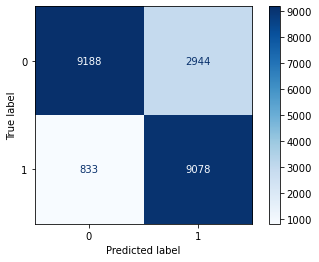

In [118]:
cm = confusion_matrix(y_test, preds)

ConfusionMatrixDisplay(cm, display_labels=gbc.classes_).plot(cmap='Blues');

### **Summary: 28% increase from baseline!**

# #2 Model - Owner Surrender

In [42]:
features = (owner_surrender.drop(columns = ['adopted']).columns)
X = owner_surrender[features]
y = owner_surrender['adopted']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

In [44]:
from sklearn.preprocessing import StandardScaler

# Instantiate
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [45]:
def pipe(model):
    #instantiate model
    model = model()
    #fit to scaled data
    model.fit(X_train_sc, y_train)
    
    #make predictions
    predictions = model.predict(X_test_sc)

    #print results
    print(f'{model} training score: {model.score(X_train_sc, y_train)}')
    print(f'{model} testing score: {model.score(X_test_sc, y_test)}')

    return

In [46]:
pipe(LogisticRegression)

LogisticRegression() training score: 0.7325886301657227
LogisticRegression() testing score: 0.6912065439672802


In [47]:
pipe(DecisionTreeClassifier)

DecisionTreeClassifier() training score: 0.9994755611495699
DecisionTreeClassifier() testing score: 0.686330029888312


In [48]:
pipe(AdaBoostClassifier)

AdaBoostClassifier() training score: 0.7174323473882945
AdaBoostClassifier() testing score: 0.7110272140946987


In [52]:
pipe(GradientBoostingClassifier)

GradientBoostingClassifier() training score: 0.7386196769456681
GradientBoostingClassifier() testing score: 0.7330501809029416


In [54]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train_sc, y_train)

#make predictions
preds = gbc.predict(X_test_sc)

In [55]:
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.79      0.37      0.50      2329
           1       0.72      0.94      0.82      4028

    accuracy                           0.73      6357
   macro avg       0.76      0.66      0.66      6357
weighted avg       0.75      0.73      0.70      6357

[[ 861 1468]
 [ 230 3798]]


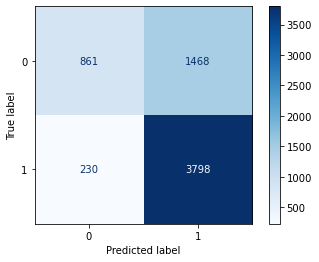

In [56]:
cm = confusion_matrix(y_test, preds)

ConfusionMatrixDisplay(cm, display_labels=gbc.classes_).plot(cmap='Blues');

### **Summary: 10% increase from baseline!**

# #3 Model - Public Assist

In [70]:
features = (public_assist.drop(columns = ['adopted']).columns)
X = public_assist[features]
y = public_assist['adopted']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

In [72]:
from sklearn.preprocessing import StandardScaler

# Instantiate
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [73]:
def pipe(model):
    #instantiate model
    model = model()
    #fit to scaled data
    model.fit(X_train_sc, y_train)
    
    #print results
    print(f'{model} training score: {model.score(X_train_sc, y_train)}')
    print(f'{model} testing score: {model.score(X_test_sc, y_test)}')

    return

In [74]:
pipe(LogisticRegression)

LogisticRegression() training score: 0.9045906132237067
LogisticRegression() testing score: 0.8782117163412128


/Users/ksylvia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
pipe(DecisionTreeClassifier)

DecisionTreeClassifier() training score: 0.999314833847208
DecisionTreeClassifier() testing score: 0.8663926002055499


In [76]:
pipe(AdaBoostClassifier)

AdaBoostClassifier() training score: 0.894998287084618
AdaBoostClassifier() testing score: 0.8920863309352518


In [77]:
pipe(GradientBoostingClassifier)

GradientBoostingClassifier() training score: 0.906988694758479
GradientBoostingClassifier() testing score: 0.8987667009249743


In [78]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train_sc, y_train)

#make predictions
preds = gbc.predict(X_test_sc)

In [79]:
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1665
           1       0.71      0.49      0.58       281

    accuracy                           0.90      1946
   macro avg       0.81      0.73      0.76      1946
weighted avg       0.89      0.90      0.89      1946

[[1609   56]
 [ 143  138]]


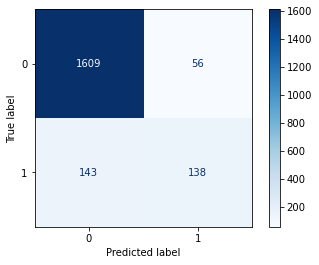

In [80]:
cm = confusion_matrix(y_test, preds)

ConfusionMatrixDisplay(cm, display_labels=gbc.classes_).plot(cmap='Blues');

### **Summary: 5% increase from baseline!**

# #4 Model - Euthanasia Request

In [57]:
features = (euthanasia.drop(columns = ['adopted']).columns)
X = euthanasia[features]
y = euthanasia['adopted']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

In [59]:
from sklearn.preprocessing import StandardScaler

# Instantiate
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [60]:
def pipe(model):
    #instantiate model
    model = model()
    #fit to scaled data
    model.fit(X_train_sc, y_train)
    
    #print results
    print(f'{model} training score: {model.score(X_train_sc, y_train)}')
    print(f'{model} testing score: {model.score(X_test_sc, y_test)}')

    return

In [61]:
pipe(LogisticRegression)

LogisticRegression() training score: 1.0
LogisticRegression() testing score: 0.9076923076923077


In [62]:
pipe(DecisionTreeClassifier)

DecisionTreeClassifier() training score: 1.0
DecisionTreeClassifier() testing score: 0.9538461538461539


In [63]:
pipe(AdaBoostClassifier)

AdaBoostClassifier() training score: 1.0
AdaBoostClassifier() testing score: 0.9538461538461539


In [64]:
pipe(GradientBoostingClassifier)

GradientBoostingClassifier() training score: 1.0
GradientBoostingClassifier() testing score: 0.9538461538461539


In [66]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train_sc, y_train)

#make predictions
preds = gbc.predict(X_test_sc)

In [68]:
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        61
           1       1.00      0.25      0.40         4

    accuracy                           0.95        65
   macro avg       0.98      0.62      0.69        65
weighted avg       0.96      0.95      0.94        65

[[61  0]
 [ 3  1]]


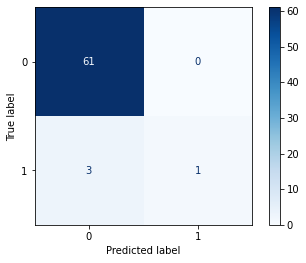

In [69]:
cm = confusion_matrix(y_test, preds)

ConfusionMatrixDisplay(cm, display_labels=gbc.classes_).plot(cmap='Blues');

### **Summary: 1% increase from baseline!**

# #5 Model - Wildlife

In [81]:
features = (wildlife.drop(columns = ['adopted']).columns)
X = wildlife[features]
y = wildlife['adopted']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

In [83]:
from sklearn.preprocessing import StandardScaler

# Instantiate
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [84]:
def pipe(model):
    #instantiate model
    model = model()
    #fit to scaled data
    model.fit(X_train_sc, y_train)
    
    #print results
    print(f'{model} training score: {model.score(X_train_sc, y_train)}')
    print(f'{model} testing score: {model.score(X_test_sc, y_test)}')

    return

In [85]:
pipe(LogisticRegression)

LogisticRegression() training score: 1.0
LogisticRegression() testing score: 0.9976322020520916


In [86]:
pipe(DecisionTreeClassifier)

DecisionTreeClassifier() training score: 1.0
DecisionTreeClassifier() testing score: 0.9984214680347278


In [87]:
pipe(AdaBoostClassifier)

AdaBoostClassifier() training score: 1.0
AdaBoostClassifier() testing score: 0.9992107340173638


In [88]:
pipe(GradientBoostingClassifier)

GradientBoostingClassifier() training score: 1.0
GradientBoostingClassifier() testing score: 0.9984214680347278


In [89]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train_sc, y_train)

#make predictions
preds = gbc.predict(X_test_sc)

In [90]:
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1265
           1       0.00      0.00      0.00         2

    accuracy                           1.00      1267
   macro avg       0.50      0.50      0.50      1267
weighted avg       1.00      1.00      1.00      1267

[[1265    0]
 [   2    0]]


/Users/ksylvia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ksylvia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ksylvia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


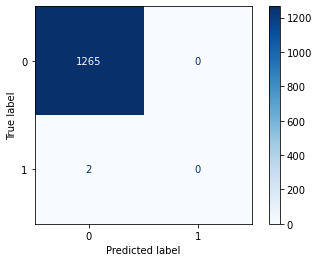

In [91]:
cm = confusion_matrix(y_test, preds)

ConfusionMatrixDisplay(cm, display_labels=gbc.classes_).plot(cmap='Blues');

### **Summary: Right in line with baseline!**

# #6 Model - Abandoned

In [92]:
features = (abandoned.drop(columns = ['adopted']).columns)
X = abandoned[features]
y = abandoned['adopted']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

In [94]:
from sklearn.preprocessing import StandardScaler

# Instantiate
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [95]:
def pipe(model):
    #instantiate model
    model = model()
    #fit to scaled data
    model.fit(X_train_sc, y_train)
    
    #print results
    print(f'{model} training score: {model.score(X_train_sc, y_train)}')
    print(f'{model} testing score: {model.score(X_test_sc, y_test)}')

    return

In [96]:
pipe(LogisticRegression)

LogisticRegression() training score: 0.9637462235649547
LogisticRegression() testing score: 0.7387387387387387


In [97]:
pipe(DecisionTreeClassifier)

DecisionTreeClassifier() training score: 1.0
DecisionTreeClassifier() testing score: 0.8108108108108109


In [98]:
pipe(AdaBoostClassifier)

AdaBoostClassifier() training score: 0.9305135951661632
AdaBoostClassifier() testing score: 0.8198198198198198


In [99]:
pipe(GradientBoostingClassifier)

GradientBoostingClassifier() training score: 0.9607250755287009
GradientBoostingClassifier() testing score: 0.8018018018018018


In [100]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train_sc, y_train)

#make predictions
preds = gbc.predict(X_test_sc)

In [101]:
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78        56
           1       0.75      0.91      0.82        55

    accuracy                           0.80       111
   macro avg       0.82      0.80      0.80       111
weighted avg       0.82      0.80      0.80       111

[[39 17]
 [ 5 50]]


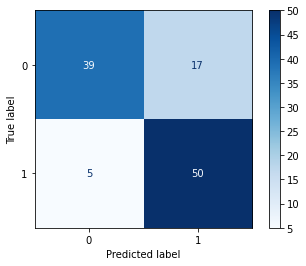

In [102]:
cm = confusion_matrix(y_test, preds)

ConfusionMatrixDisplay(cm, display_labels=gbc.classes_).plot(cmap='Blues');

### **Summary: 30% ABOVE baseline!**